# DELE CA1

## Import General Dependencies

In [1]:
# Data Manipulation Dependencies
import numpy as np
import pandas as pd

# Graphing Dependencies
import matplotlib.pyplot as plt
import seaborn as sb

# General Machine Learning Dependencies
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Deep Learning Dependencies
import tensorflow as tf
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers

## General Utility Functions

In [2]:
def confusion_matrix(X_test, y_test, model):
    y_pred = model.predict(X_test).argmax(axis=1)
    y_true = y_test.argmax(axis=1)
    df = pd.DataFrame(
        data=np.zeros(shape=(10, 10)).astype(int),
        index=pd.Index(data=np.arange(10), name='Prediction'),
        columns=pd.Index(data=np.arange(10), name='Actual')
    )
    correct = 0
    wrong = 0
    for i in range(len(y_true)):
        df[y_pred[i]][y_true[i]] += 1
        if y_pred[i] == y_true[i]:
            correct += 1
        else:
            wrong += 1
    
    return df, correct / (correct + wrong) * 100.0

# print(confusion_matrix(X_test, y_test, model))

## Part A > Fashion MNIST

### Data Preparation

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
label_dict = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

### Exploratory Data Analysis

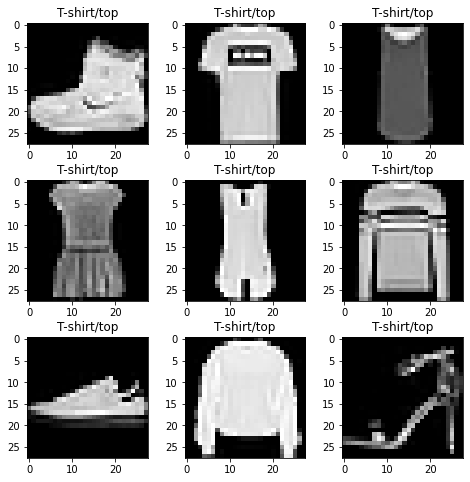

In [5]:
def plot_a(X_train, y_train, labels):
    fig, ax = plt.subplots(3, 3, figsize=(8, 8))
    for i in range(9):
        current_ax = ax[i // 3, i % 3]
        current_ax.imshow(X_train[i], cmap='gray')
        current_ax.set_title(labels[y_train[i].argmax()])
    plt.subplots_adjust(hspace=0.3)

plot_a(X_train, y_train, label_dict)

### Image Augmentation

### Data Pre-Processing

In [6]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

### Hyper-Parameter Tuning

In [7]:
# Simple Dense Neural Network
def simple_dnn(X_train, y_train):
    dnn = models.Sequential(layers=[
        layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Flatten(),
        layers.Dense(units=10, activation='softmax')
    ])
    dnn.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    dnn.fit(x=X_train, y=y_train, epochs=3, batch_size=1000, validation_split=0.2)

simple_dnn(X_train, y_train)

Epoch 1/3
48/48 [==============================] - 1s 9ms/step - loss: 1.1644 - accuracy: 0.6481 - val_loss: 0.8248 - val_accuracy: 0.7367
Epoch 2/3
48/48 [==============================] - 0s 6ms/step - loss: 0.7399 - accuracy: 0.7563 - val_loss: 0.6616 - val_accuracy: 0.7769
Epoch 3/3
48/48 [==============================] - 0s 8ms/step - loss: 0.6290 - accuracy: 0.7903 - val_loss: 0.5968 - val_accuracy: 0.7977


In [8]:
# Simple Convolutional Neural Network
def simple_cnn(X_train, y_train):
    cnn = models.Sequential(layers=[
        layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Conv2D(filters=3, kernel_size=3),
        layers.Flatten(),
        layers.Dense(units=30, activation='relu'),
        layers.Dense(units=10, activation='softmax')
    ])
    cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    cnn.fit(x=X_train, y=y_train, epochs=3, batch_size=1000, validation_split=0.2)

simple_cnn(X_train, y_train)

Epoch 1/3
48/48 [==============================] - 3s 52ms/step - loss: 1.0843 - accuracy: 0.6291 - val_loss: 0.7433 - val_accuracy: 0.7393
Epoch 2/3
48/48 [==============================] - 2s 47ms/step - loss: 0.6602 - accuracy: 0.7742 - val_loss: 0.5556 - val_accuracy: 0.8118
Epoch 3/3
48/48 [==============================] - 2s 48ms/step - loss: 0.5615 - accuracy: 0.8012 - val_loss: 0.5480 - val_accuracy: 0.8088


In [9]:
# Logical Convolutional Neural Network
def logical_cnn(X_train, y_train):
    cnn = models.Sequential(layers=[
        layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Conv2D(filters=8, kernel_size=3, activation='relu'),
        layers.MaxPool2D(pool_size=2, strides=2),
        layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(units=32, activation='relu'),
        layers.Dense(units=16, activation='relu'),
        layers.Dense(units=10, activation='softmax')
    ])
    cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    cnn.fit(x=X_train, y=y_train, epochs=3, batch_size=1000, validation_split=0.2)

logical_cnn(X_train, y_train)

Epoch 1/3
48/48 [==============================] - 5s 102ms/step - loss: 0.8903 - accuracy: 0.6779 - val_loss: 1.7335 - val_accuracy: 0.7694
Epoch 2/3
48/48 [==============================] - 5s 97ms/step - loss: 0.5103 - accuracy: 0.8117 - val_loss: 1.5443 - val_accuracy: 0.8073
Epoch 3/3
48/48 [==============================] - 5s 96ms/step - loss: 0.4307 - accuracy: 0.8424 - val_loss: 1.3414 - val_accuracy: 0.8440


Epoch 1/10
960/960 [==============================] - 16s 17ms/step - loss: 0.7419 - accuracy: 0.7433 - val_loss: 0.3896 - val_accuracy: 0.8621
Epoch 2/10
960/960 [==============================] - 12s 13ms/step - loss: 0.4795 - accuracy: 0.8321 - val_loss: 0.3560 - val_accuracy: 0.8687
Epoch 3/10
960/960 [==============================] - 12s 12ms/step - loss: 0.4118 - accuracy: 0.8565 - val_loss: 0.3193 - val_accuracy: 0.8868
Epoch 4/10
960/960 [==============================] - 11s 11ms/step - loss: 0.3759 - accuracy: 0.8688 - val_loss: 0.2978 - val_accuracy: 0.8899
Epoch 5/10
960/960 [==============================] - 10s 10ms/step - loss: 0.3565 - accuracy: 0.8759 - val_loss: 0.3053 - val_accuracy: 0.8895
Epoch 6/10
960/960 [==============================] - 11s 11ms/step - loss: 0.3364 - accuracy: 0.8801 - val_loss: 0.3008 - val_accuracy: 0.8947
Epoch 7/10
960/960 [==============================] - 13s 14ms/step - loss: 0.3167 - accuracy: 0.8859 - val_loss: 0.2876 - val_accuracy:

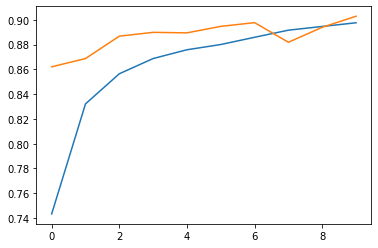

In [10]:
# Tuning Convolutional Neural Network
def logical_cnn_history(X_train, y_train):
    cnn = models.Sequential(layers=[
        layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Conv2D(filters=8, kernel_size=3, activation='relu'),
        layers.MaxPool2D(pool_size=2, strides=2),
        layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(units=32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(units=16, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(units=10, activation='softmax')
    ])
    cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # cnn.summary()
    history = cnn.fit(x=X_train, y=y_train, epochs=10, batch_size=50, validation_split=0.2, verbose=1)
    hist_dict = history.history
    x = range(len(hist_dict['loss']))
    sb.lineplot(x=x, y=hist_dict['accuracy'])
    sb.lineplot(x=x, y=hist_dict['val_accuracy'])

logical_cnn_history(X_train, y_train)

Epoch 1/10
960/960 [==============================] - 35s 34ms/step - loss: 0.6728 - accuracy: 0.7691 - val_loss: 0.4869 - val_accuracy: 0.8190
Epoch 2/10
960/960 [==============================] - 32s 34ms/step - loss: 0.4203 - accuracy: 0.8525 - val_loss: 0.3436 - val_accuracy: 0.8760
Epoch 3/10
960/960 [==============================] - 35s 36ms/step - loss: 0.3690 - accuracy: 0.8709 - val_loss: 0.3363 - val_accuracy: 0.8772
Epoch 4/10
960/960 [==============================] - 32s 34ms/step - loss: 0.3405 - accuracy: 0.8808 - val_loss: 0.3585 - val_accuracy: 0.8663
Epoch 5/10
960/960 [==============================] - 19s 20ms/step - loss: 0.3215 - accuracy: 0.8862 - val_loss: 0.3344 - val_accuracy: 0.8735


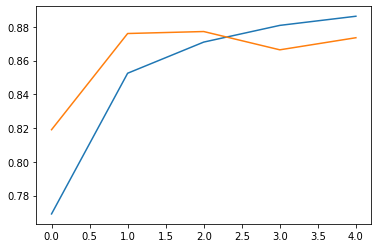

In [11]:
# Tuning Convolutional Neural Network
from tensorflow.keras.optimizers import Adam


def improved_cnn(X_train, y_train, lr=0.001, b1=0.9):
    cnn = models.Sequential(layers=[
        layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Conv2D(filters=20, kernel_size=3, activation='relu'),
        layers.Dropout(0.5),
        layers.MaxPool2D(pool_size=2, strides=2),
        layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(units=128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(units=64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(units=32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(units=10, activation='softmax')
    ])
    cnn.compile(optimizer=Adam(learning_rate=lr, beta_1=b1),
                loss='categorical_crossentropy', metrics=['accuracy'])
    # cnn.summary()
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)
    history = cnn.fit(x=X_train, y=y_train, epochs=10, batch_size=50,
                      validation_split=0.2, verbose=1, callbacks=[early_stop])
    hist_dict = history.history
    x = range(len(hist_dict['loss']))
    sb.lineplot(x=x, y=hist_dict['accuracy'])
    sb.lineplot(x=x, y=hist_dict['val_accuracy'])


improved_cnn(X_train, y_train)


In [12]:
# Tuning Convolutional Neural Network
from tensorflow.keras.optimizers import Adam, SGD


def improved_cnn_2(X_train, y_train, lr=0.001, m=0):
    cnn = models.Sequential(layers=[
        layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Conv2D(filters=20, kernel_size=3, activation='relu'),
        layers.Dropout(0.5),
        layers.MaxPool2D(pool_size=2, strides=2),
        layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(units=128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(units=64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(units=32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(units=10, activation='softmax')
    ])
    cnn.compile(optimizer=SGD(learning_rate=lr, momentum=m),
                loss='categorical_crossentropy', metrics=['accuracy'])
    # cnn.summary()
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)
    history = cnn.fit(x=X_train, y=y_train, epochs=10, batch_size=50,
                      validation_split=0.2, verbose=1, callbacks=[early_stop])
    hist_dict = history.history
    x = range(len(hist_dict['loss']))
    sb.lineplot(x=x, y=hist_dict['accuracy'])
    sb.lineplot(x=x, y=hist_dict['val_accuracy'])


improved_cnn_2(X_train, y_train, lr=0.05)


Epoch 1/10
960/960 [==============================] - 20s 20ms/step - loss: 0.7052 - accuracy: 0.7468 - val_loss: 0.8321 - val_accuracy: 0.6948
Epoch 2/10
131/960 [===>..........................] - ETA: 15s - loss: 0.4996 - accuracy: 0.8226

KeyboardInterrupt: 

Epoch 1/25
840/840 [==============================] - 28s 32ms/step - loss: 0.7330 - accuracy: 0.7470 - val_loss: 0.4366 - val_accuracy: 0.8401
Epoch 2/25
840/840 [==============================] - 27s 32ms/step - loss: 0.4584 - accuracy: 0.8423 - val_loss: 0.3587 - val_accuracy: 0.8730
Epoch 3/25
840/840 [==============================] - 28s 33ms/step - loss: 0.3994 - accuracy: 0.8615 - val_loss: 0.3503 - val_accuracy: 0.8745
Epoch 4/25
840/840 [==============================] - 27s 32ms/step - loss: 0.3679 - accuracy: 0.8719 - val_loss: 0.3027 - val_accuracy: 0.8912
Epoch 5/25
840/840 [==============================] - 26s 31ms/step - loss: 0.3346 - accuracy: 0.8810 - val_loss: 0.2971 - val_accuracy: 0.8968
Epoch 6/25
840/840 [==============================] - 26s 31ms/step - loss: 0.3198 - accuracy: 0.8859 - val_loss: 0.2977 - val_accuracy: 0.8923
Epoch 7/25
840/840 [==============================] - 28s 33ms/step - loss: 0.3069 - accuracy: 0.8920 - val_loss: 0.2868 - val_accuracy:

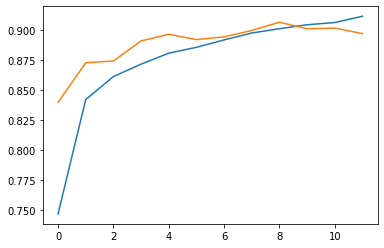

In [13]:
# Tuning Convolutional Neural Network
from tensorflow.keras.optimizers import Adam


def improved_cnn_3(X_train, y_train, lr=0.0008, b1=0.98):
    cnn = models.Sequential(layers=[
        layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Conv2D(filters=20, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.MaxPool2D(pool_size=2, strides=2),
        layers.Conv2D(filters=10, kernel_size=3, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(units=128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(units=64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(units=32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(units=10, activation='softmax')
    ])
    cnn.compile(optimizer=Adam(learning_rate=lr, beta_1=b1),
                loss='categorical_crossentropy', metrics=['accuracy'])
    # cnn.summary()
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.005, patience=3)
    history = cnn.fit(x=X_train, y=y_train, epochs=25, batch_size=50,
                      validation_split=0.3, verbose=1, callbacks=[early_stop])
    hist_dict = history.history
    x = range(len(hist_dict['loss']))
    sb.lineplot(x=x, y=hist_dict['accuracy'])
    sb.lineplot(x=x, y=hist_dict['val_accuracy'])
    return cnn

# model1 = improved_cnn_3(X_train, y_train)


In [20]:
# Tuning Convolutional Neural Network
from tensorflow.keras.optimizers import Adam


def improved_cnn_4(X_train, y_train, c_range, d_range, lr=0.001, b1=0.98):
    for c in range(c_range):
        for d in range(d_range):
            cnn = models.Sequential(
                layers=[layers.InputLayer(input_shape=(28, 28, 1))])
            for _ in range(c):
                cnn.add(layers.Conv2D(filters=16, kernel_size=3,
                        padding="same", activation='relu'))
                cnn.add(layers.BatchNormalization())

            cnn.add(layers.Flatten())

            for _ in range(d):
                cnn.add(layers.Dense(units=32, activation='relu'))
                cnn.add(layers.BatchNormalization())
                cnn.add(layers.Dropout(0.2))

            cnn.add(layers.Dense(units=10, activation='softmax'))
            cnn.compile(optimizer='adam',
                        loss='categorical_crossentropy', metrics=['accuracy'])
            cnn.fit(x=X_train, y=y_train, epochs=3, batch_size=50,
                    validation_split=0.2, verbose=0, callbacks=[])

            print(f'c={c}, d={d}: {cnn.evaluate(X_test, y_test, verbose=0)}')


improved_cnn_4(X_train, y_train, c_range=6, d_range=6)


c=0, d=0: [0.475662499666214, 0.835099995136261]
c=0, d=1: [0.45310044288635254, 0.8410999774932861]
c=0, d=2: [0.43404775857925415, 0.8406999707221985]
c=0, d=3: [0.44153690338134766, 0.8378999829292297]
c=0, d=4: [0.5009185671806335, 0.8167999982833862]
c=0, d=5: [0.5190685987472534, 0.8112000226974487]
c=1, d=0: [0.3420770466327667, 0.8809000253677368]
c=1, d=1: [0.30092519521713257, 0.8920000195503235]
c=1, d=2: [0.3128003180027008, 0.8870000243186951]
c=1, d=3: [0.3157033920288086, 0.8867999911308289]
c=1, d=4: [0.3459377586841583, 0.8792999982833862]
c=1, d=5: [0.3745987117290497, 0.8758999705314636]
c=2, d=0: [0.3434354364871979, 0.8878999948501587]
c=2, d=1: [0.28516101837158203, 0.8996000289916992]
c=2, d=2: [0.2788241505622864, 0.900600016117096]
c=2, d=3: [0.3247462511062622, 0.8859999775886536]
c=2, d=4: [0.35451632738113403, 0.8805000185966492]
c=2, d=5: [0.4015882611274719, 0.8614000082015991]
c=3, d=0: [0.3061833381652832, 0.902899980545044]
c=3, d=1: [0.2711711227893829

<AxesSubplot:xlabel='c', ylabel='d'>

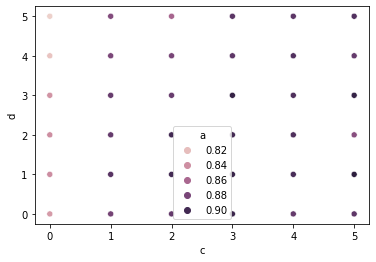

In [32]:
scores_df = pd.read_csv('./tmp/scores.csv')
sb.scatterplot(data=scores_df, x='c', y='d', hue='a')

In [ ]:
def grid_search(optimizers, )

In [30]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3043 - accuracy: 0.8910


[0.3042811155319214, 0.890999972820282]

In [14]:
# model1.save('./models/model1.h5')

In [15]:
# # Random Search
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from typing import List, Tuple
# from sklearn.model_selection import RandomizedSearchCV

# def create_model1(optimiser: str, activation: str):
#     model = models.Sequential(layers=[
#         layers.InputLayer(input_shape=(28, 28, 1)),
#         layers.Conv2D(filters=8, kernel_size=3, activation=activation),
#         layers.MaxPool2D(pool_size=2, strides=2),
#         layers.Conv2D(filters=10, kernel_size=3, activation=activation),
#         layers.BatchNormalization(),
#         layers.Flatten(),
#         layers.Dense(units=32, activation=activation),
#         layers.Dropout(0.2),
#         layers.Dense(units=16, activation=activation),
#         layers.Dropout(0.2),
#         layers.Dense(units=10, activation='softmax')
#     ])
#     model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# clf1 = KerasClassifier(build_fn=create_model1, verbose=1)

# params = {
#     'optimiser': ['adam', 'rmsprop'],
#     'epochs': [5, 10, 20],
#     'batch_size': [50, 100, 500],
#     'activation': ['relu', 'tanh']
# }

# rs = RandomizedSearchCV(estimator=clf1, param_distributions=params, cv=5, n_iter=10)
# rs_result = rs.fit(X_train, y_train)

In [16]:
# import pickle

# with open('./models/rand_search_model_1.p', 'wb') as f:
#     pickle.dump(rs_result, f)

NameError: name 'rs_result' is not defined

### Model Evaluation

In [ ]:
# model.evaluate(X_test, y_test)

## Transfer Learning (Further Improvement)

In [ ]:
from tensorflow.keras.applications import ResNet50

# ResNet50()

## Part B > CIFAR-10

### Data Partitioning

In [17]:
(X_train_2, y_train_2), (X_test_2, y_test_2) = tf.keras.datasets.cifar10.load_data()

### Data Pre-Processing

In [18]:
X_train_2.astype(float)
X_test_2.astype(float)

y_train_2 = tf.keras.utils.to_categorical(y_train_2, 10)
y_test_2 = tf.keras.utils.to_categorical(y_test_2, 10)

### Hyper-Parameter Tuning

In [19]:
# print(confusion_matrix(X_test_2, y_test_2, model2)[0])

NameError: name 'model2' is not defined

In [20]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from typing import List, Tuple
from sklearn.model_selection import RandomizedSearchCV

def create_model(hidden_layers: List[List[int]], optimiser: str, activation: str, input_shape: Tuple[int]):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    for hidden_layer in hidden_layers:
        model.add(layers.Dense(hidden_layer, activation=activation))
        model.add(layers.Conv2D(32, kernel_size=3))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

clf1 = KerasClassifier(build_fn=create_model, verbose=0)

params = {
    'optimiser': ['adam', 'rmsprop'],
    'hidden_layers': [
        [32, 64],
        [32, 64, 128],
    ],
    'epochs': [1],
    'batch_size': [100],
    'activation': ['relu'],
    'input_shape': [(28, 28, 1)]
}

gs = RandomizedSearchCV(estimator=clf1, param_distributions=params, n_iter=1)
gs_result = gs.fit(X_train, y_train)

In [21]:
pd.DataFrame(gs_result.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_optimiser,param_input_shape,param_hidden_layers,param_epochs,param_batch_size,param_activation,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,137.310002,5.326936,9.431339,0.690722,rmsprop,"(28, 28, 1)","[32, 64, 128]",1,100,relu,"{'optimiser': 'rmsprop', 'input_shape': (28, 2...",0.884833,0.850083,0.865833,0.8475,0.879083,0.865467,0.014967,1


In [ ]:
# import pickle

# with open('./models/model1.p', 'rb') as f:
#     print(pickle.load(f))

### Model Instantiation

In [ ]:

model2 = models.Sequential([
    layers.Rescaling(1 / 255),
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train_2, y_train_2, epochs=3, batch_size=10, validation_split=0.1)

### Model Training